# Cvičení 5

Tématem tohoto cvičení je iterační řešení soustav lineárních rovnic.

## Jacobiho a Gaussova-Seidelova metoda

### Příklad 1

Připomeňme, že předpis pro $i$-tý prvek vektoru $\mathbf{x}^{k+1}$ je v případě Jacobiho metody
$$(\mathbf{x}^{k+1})_i = \frac{1}{a_{i,i}}\left(b_i - \sum_{j=1, j\neq i}^n a_{i, j}(\mathbf{x}^k)_j\right)$$
a v případě Gaussovy-Seidelovy metody
$$(\mathbf{x}^{k+1})_i = \frac{1}{a_{i,i}}\left(b_i - \sum_{j=1}^{i-1} a_{i, j}(\mathbf{x}^k)_j - \sum_{j=i+1}^{n} a_{i, j}(\mathbf{x}^k)_j\right).$$


Mějme soustavu rovnic $\mathsf{A}\mathbf{x}=\mathbf{b}$

$$
\mathsf{A}=
\begin{bmatrix}
4 & 2 & 1 \\
3 & 10 & 3 \\
1 & 1 &5
\end{bmatrix},\qquad
\mathbf{b} = 
\begin{bmatrix}
2 \\ 4 \\ 3
\end{bmatrix}
$$

1) Nalezněte přibližné řešení $\mathbf{x}^3$ této soustavy pomocí tří iterací Jacobiho metody (ručně). Jako počáteční vektor volte
$$\mathbf{x}^0=
\begin{bmatrix}
1\\1\\1
\end{bmatrix}
$$

2) Nalezněte přibližné řešení $\mathbf{x}^3$ této soustavy pomocí tří iterací Gaussovy-Seidelovy metody (ručně). Počáteční vektor volte stejně.

3) Určete přesné řešení $\mathbf{x}$ pomocí NumPy (přes `numpy.linalg.solve`). Pomocí něj vypočtěte normy chyb a reziduí vámi nalezených řešení:

$$\|\mathbf{e}_{\mathrm{Jacobi}}\| = \|\mathbf{x}_{\mathrm{Jacobi}} - \mathbf{x}\|$$
$$\|\mathbf{e}_{\mathrm{Gauss-Seidel}}\| = \|\mathbf{x}_{\mathrm{Gauss-Seidel}} - \mathbf{x}\|$$
$$\|\mathbf{r}_{\mathrm{Jacobi}}\| = \|\mathbf{b} - \mathsf{A}\mathbf{x}_{\mathrm{Jacobi}}\|$$
$$\|\mathbf{r}_{\mathrm{Gauss-Seidel}}\| = \|\mathbf{b} - \mathsf{A}\mathbf{x}_{\mathrm{Gauss-Seidel}}\|$$

Porovnejte přesnost řešení jednotlivými metodami.

### Příklad 2

Naprogramujte funkci `jacobi()`, která implementuje Jacobiho iterační metodu. Na vstupu bude matice `A`, vektor pravé strany `b`, počáteční odhad `x0`, relativní přesnost `tol` a maximální počet iterací `max_it`. Funkce vrátí vektor řešení, skutečný počet iterací a dosaženou přesnost (normu vektoru rezidua $\|\mathbf{r}^{k}\|$). 

Jako počáteční vektor volte vektor samých nul.

Ukončovací podmínku volte ve tvaru relativní změny rezidua:
$$\|\frac{\mathbf{r}^{k}}{\mathbf{r}^{0}}\| < \varepsilon$$

Vyjít můžete např. z následujícího pseudokódu:


$$
\begin{array}{l}
\text{Input: matrix } A, \text{ right-hand side vector } b, \text{ initial approximation } x_0, \text{ tolerance tol, maximum number of iterations max\_it.}\\
\text{1. Set iteration counter } k = 0\text{, set } x_{\mathrm{prev}} = x_0  \\
\text{2. Calculate the initial residual norm } \text{res\_norm\_0} = \text{res\_norm} = ||b-A*x_0||\\
\text{3. \bf{while} } \text{res\_norm/res\_norm\_0 > tol and k < max\_it \bf{do}}\\
\quad\begin{array}{l}
\text{1. Initialize a new solution vector } x_\text{new}\\
\text{2. \bf{for} } i = 1 \text{ to } n \text{ \bf{do} } \text{(where } n \text{ is the number of rows in } A)\\
\qquad\begin{array}{l}
\text{1. Calculate the sum of } A(i, j) * x_{\mathrm{prev}}(j) \text{ for all } j \neq i\\
\text{2. Update } x_\text{new}(i) = (b(i) - \text{sum}) / A(i, i)\\
\end{array}\\
\text{3. end for}\\
\text{4. Calculate the residual norm: } \text{res\_norm} = ||b-A*x_\text{new}||\\
\text{5. Update the solution: } x_{\mathrm{prev}} = x_\text{new}\\
\text{6. Increment the iteration counter: } k = k + 1\\
\end{array}\\
\text{4. end while}\\
\text{5. The solution is stored in } x_\text{new}\\
\end{array}
$$

**Poznámka**: potřebujete násobit matici a vektor, dbejte tedy na správné rozměry jednotlivých vektorů.


In [3]:
import numpy as np

In [4]:
# UKOL: 
# 1. vygenerujte vhodnou systemovou matici (nahodnou diagonalne dominantni matici, napr. rozmeru 5x5)
# 2. vygenerujte nahodny vektor prave strany
# 3. vygenerujte počáteční vektor x0 (nulovy vektor)

A = np.random.rand(5,5)
A = A + 4 * np.eye(5)
b = np.random.rand(5,1)
x0 = np.zeros((5,1))

In [5]:
# UKOL: Doplnte chybejici kod funkce jacobi

def jacobi(A, b, x0, tol, max_it):

    m, n = np.shape(A)

    k = 0                               # citac iteraci
    r0 = np.linalg.norm(b - A@x0)       # pocatecni norma rezidua
    r = r0

    x_prev = np.copy(x0)                # potrebujeme x_prev na zaklade ktereho budeme pocitat x_new

    while r/r0 > tol and k < max_it:
        x_new = np.zeros_like(x0)
        for i in range(m):
            suma = 0
            for j in range(n):
                if j != i:
                    suma += (A[i,j] * x_prev[j])
            x_new[i] = (b[i] - suma)/A[i,i]
        x_prev = x_new.copy()
        r = np.linalg.norm(b - A @ x_new)
        k += 1

        # doplnte
        
    return x_new, k, r

In [6]:
# UKOL: Otestujte vami vytvorenou metodu
# 1. porovnejte reseni pomoci vasi metody a zabudovane numpy metody solve
# 2. vytisknete pocet iteraci potrebnych k dosazeni reseni a normu rezidua

x, k, r = jacobi(A, b, x0, 1e-4, 1000)

x_numpy = np.linalg.solve(A,b)
print("Vase reseni: ")
print(x)
print("Numpy reseni: ")
print(x_numpy)
# vytisknete pocet iteraci a normu rezidua

Vase reseni: 
[[0.01119734]
 [0.018659  ]
 [0.08282056]
 [0.09756218]
 [0.11054441]]
Numpy reseni: 
[[0.01119089]
 [0.01865405]
 [0.08281542]
 [0.09755888]
 [0.11053879]]


## Richardsonova metoda

Základní tvar Richardsonovy iterační metody je 
$$\mathbf{x}^{k+1} = \mathbf{x}^k + \omega\mathbf{r}^k,$$
kde $\omega>0$ a $\mathbf{r}^k = \mathbf{b}-\mathsf{A}\mathbf{x}^k$ je reziduum. 

Volbou hodnoty $\omega$ jsme schopni ovlivnit rychlost konvergence metody. Optimální hodnota je 
$$\omega = \frac{2}{\lambda_{\mathrm{min}}+\lambda_{\mathrm{max}}}$$

Metoda konverguje pro $\omega\in(0, 2/\lambda_{\mathrm{max}})$.

Následující funkce má jako volitelný parameter hodnotu `omega`. Doplňte do ní výpočet optimální hodnoty `omega`, pokud ji uživatel nezadá na vstupu.

**Tip**: budete potřebovat funkci `eigh` z NumPy, která slouží k určení vlastních čísel reálné symetrické matice.

In [7]:
from numpy.linalg import eigh

def richardson(A, b, x0, tol, max_it, omega=None):

    r_init = np.linalg.norm(b - A@x0)
    x = x0.copy()
    r = b - A.dot(x)
    
    if omega is None:
        vl = np.linalg.eigh(A)[0]
        omega = 2/(min(vl) + max(vl))
        # UKOL: Doplnte vypocet optimalni hodnoty omega:

    k = 0
    
    while np.linalg.norm(r) / r_init > tol and k < max_it:
        # UKOL: Doplnte chybejici kod
        x = x + omega * r
        r = b - A @ x
        k += 1

    return x, k

In [8]:
# Otestujeme vasi implementaci

A = np.random.rand(5, 5)
A = 0.5*(A + A.T)           # zajisti symetrii
A = A + 5 * np.eye(5)  
b = np.random.rand(5, 1)
x0 = np.zeros((5, 1))


x, k = richardson(A, b, x0, 0.0001, 100)
print(x)
print("Pocet iteraci: {}".format(k))
print(np.linalg.solve(A, b))

[[ 0.14030656]
 [-0.01174273]
 [ 0.09617868]
 [ 0.03653954]
 [ 0.14950365]]
Pocet iteraci: 7
[[ 0.1402992 ]
 [-0.01175204]
 [ 0.09617128]
 [ 0.03653298]
 [ 0.14949896]]


Nakonec otestujeme, jak počet iterací Richardsonovy metody závisí na parametru `omega`. Následující kód tedy:
1. Vygeneruje symetrickou pozitivně definitní matici rozměru $10\times 10$,
2. určí její nejmenší a největší vlastní číslo,
3. podle těchto vlastních čísel určí maximální možnou velikost parametru `omega` zajišťující konvergenci,
4. určí optimální `omega`,
5. řeší soustavu postupně pro různá omega mezi 0 a `omega_max` voláním vámi implementované metody,
6. vykreslí do grafu potřebný počet iterací v závislosti na `omega`

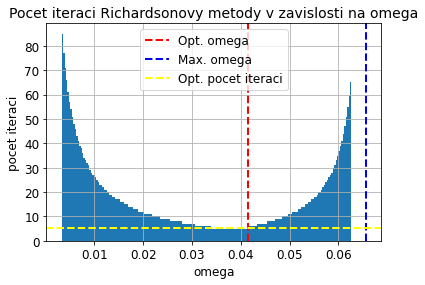

In [9]:
import matplotlib.pyplot as plt

# vygenerujeme matici, vektor prave strany
m = 10
A = np.random.rand(m, m)
A = A + A.T
max_row_sum = np.linalg.norm(A, np.inf)
A = A + 2*m * np.eye(m) 
b = np.random.rand(m, 1)

# vypocitame optimalni omega, max. omega
lambda_min = np.linalg.eigh(A)[0][0]
lambda_max = np.linalg.eigh(A)[0][-1]
omega_max = 2 / lambda_max
omega_opt = 2 / (lambda_min + lambda_max)
rho_opt = 1 - omega_opt * lambda_min

# vytvorime pole hodnot mezi 0 a omega_max
omegas = np.linspace(omega_max * 0.05, omega_max * 0.95, 200)

epsilon = 1e-3
max_it = 200
k_opt = np.log(epsilon) / np.log(rho_opt) # odhad potrebneho poctu iteraci pri omega_opt

# pocatecni odhad reseni
x0 = np.random.rand(m, 1)

# pole, do ktereho ukladame pocty iteraci v zavislosti na omega
n_iters = np.zeros(len(omegas))

# vyresime postupne ve smycce pro ruzna omega
for i in range(len(omegas)):
    _, n_iters[i] = richardson(A, b, x0, epsilon, max_it, omegas[i])

# vykreslime
plt.figure()
plt.bar(omegas, n_iters, omegas[1]-omegas[0], align='edge')
plt.title('Pocet iteraci Richardsonovy metody v zavislosti na omega', fontsize=14)
plt.xlabel('omega', fontsize=12)
plt.ylabel('pocet iteraci', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.axvline(x=omega_opt, linestyle='--', color='red', label='Opt. omega', linewidth=2)
plt.axvline(x=omega_max, linestyle='--', color='blue', label='Max. omega', linewidth=2)
plt.axhline(y=k_opt, linestyle='--', color='yellow', label='Opt. pocet iteraci', linewidth=2)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()


## Domácí úkol

Implementujte Gaussovu-Seidelovu iterační metodu. Funkce `gauss_seidel` bude mít stejné vstupy a výstupy jako `jacobi`. Vyjděte z funkce `jacobi`, kterou vhodně upravte.

**Odevzdání**: Celý tento notebook zašlete na e-mail vyučujícího do 6. 4. 2023 16:00. Jako předmět uveďte "NLA1 DU3".

In [10]:
# UKOL: Doplnte.

def gauss_seidel(A, b, x0, tol, max_it):
    m, n = np.shape(A)

    k = 0                               # citac iteraci
    r0 = np.linalg.norm(b - A@x0)       # pocatecni norma rezidua
    r = r0

    x_prev = np.copy(x0)                # potrebujeme x_prev na zaklade ktereho budeme pocitat x_new

    while r/r0 > tol and k < max_it:
        x_new = np.zeros_like(x0)
        for i in range(m):
            suma = 0
            for j in range(n):
                if j != i:
                    if j<i:
                        suma += (A[i,j] * x_new[j])
                    else:
                        suma += (A[i,j] * x_prev[j])
            x_new[i] = (b[i] - suma)/A[i,i]
        x_prev = x_new.copy()
        r = np.linalg.norm(b - A @ x_new)
        k += 1

        # doplnte
        
    return x_new, k, r
    
    

In [11]:
# Zavolejte tuto bunku a otestujte, ze vase metoda funguje spravne

# sestavime diagonalne dominantni matici, vektor prave strany, pocatecni odhad reseni
A = np.array([[4, 2, 1], [3, 10, 3], [1, 1, 5]])
b = np.array([[2, 4, 3]]).T
x0 = np.ones((3, 1))

# zavolame vasi metodu
x, k, r = gauss_seidel(A, b, x0, 1e-5, 100)

# vyresime pomoci numpy
x_numpy = np.linalg.solve(A, b)

# porovname
print("Vase reseni: ")
print(x)
print("Numpy reseni: ")
print(x_numpy)
print("Metoda dokonvergovala k reseni v {} iteracich.".format(k))
print("Norma rezidua je {}.".format(r))

Vase reseni: 
[[0.29298653]
 [0.1592408 ]
 [0.50955453]]
Numpy reseni: 
[[0.29299363]
 [0.15923567]
 [0.50955414]]
Metoda dokonvergovala k reseni v 7 iteracich.
Norma rezidua je 3.5917180685905035e-05.


Pomocí metody `jacobi` ze cvičení a metody `gauss_seidel` vyřešte soustavu definovanou v předchozí buňce s různou přesností `tol` (0.01, 0.0001, 1e-8). Zapište počty iterací do tabulky.

In [12]:
x_jac_1, k_jac_1, r_jac_1 = jacobi(A, b, x0, 0.01, 100)
x_jac_2, k_jac_2, r_jac_2 = jacobi(A, b, x0, 0.0001, 100)
x_jac_3, k_jac_3, r_jac_3 = jacobi(A, b, x0, 1e-8, 100)

x_gs_1, k_gs_1, r_gs_1 = gauss_seidel(A, b, x0, 0.01, 100)
x_gs_2, k_gs_2, r_gs_2 = gauss_seidel(A, b, x0, 0.0001, 100)
x_gs_3, k_gs_3, r_gs_3 = gauss_seidel(A, b, x0, 1e-8, 100)

print("Pocty iteraci Jacobiho metody")
print([k_jac_1, k_jac_2, k_jac_3])

print("Pocty iteraci Gaussovy-Seidelovy metody")
print([k_gs_1, k_gs_2, k_gs_3])

Pocty iteraci Jacobiho metody
[9, 17, 34]
Pocty iteraci Gaussovy-Seidelovy metody
[3, 6, 11]


In [13]:
# Doplnte tabulku s pocty iteraci:
# Jacobi:
# tol = 0.01,   k = 9
# tol = 0.0001, k = 17
# tol = 1e-8,   k = 34

# Gauss-Seidel:
# tol = 0.01,   k = 3
# tol = 0.0001, k = 6
# tol = 1e-8,   k = 11